# Phase 1: Exploratory Data Analysis (EDA)

## Objective
As a first step in our data science lifecycle, we need to understand the data we are working with. This notebook is strictly for **analysis and understanding**. We are not training models or building production pipelines here.

**Goals:**
1. Understand the data structure (rows, columns, types).
2. Check for class imbalance (how many toxic vs non-toxic?).
3. Analyze the text data (length, common patterns).
4. visualize the samples to understand the problem 'humanly'.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style for better aesthetics
sns.set_style('whitegrid')
%matplotlib inline

## 1. Load Data
We load the raw training data. Note that we access it from the `../data/raw/` directory.

In [12]:
DATA_PATH = '../data/raw/train.csv'

if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print("Data loaded successfully.")
else:
    print(f"File not found at {DATA_PATH}. Please ensure data is placed in the data/raw folder.")

Data loaded successfully.


## 2. Basic Inspection
Let's look at the shape of the dataset and the data types.

In [13]:
if 'df' in locals():
    print(f"Dataset Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nData Info:")
    df.info()

Dataset Shape: (159571, 8)

First 5 rows:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## 3. Target Distribution (Class Imbalance)
In toxicity detection, we expect most comments to be normal (safe). Let's quantify this imbalance.
We assume the target column is `toxic`. If the dataset has multiple labels (like the Jigsaw dataset), we will focus on the main `toxic` flag for this beginner project.

Class Counts:
toxic
0    144277
1     15294
Name: count, dtype: int64

Class Percentage:
toxic
0    90.415552
1     9.584448
Name: proportion, dtype: float64


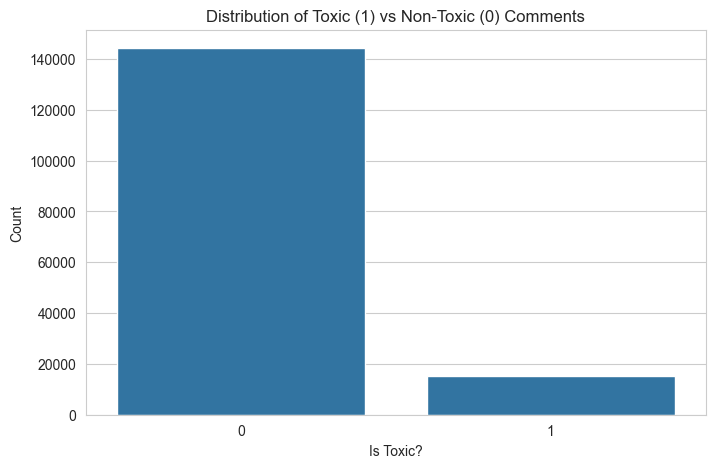

In [14]:
target_col = 'toxic'

if 'df' in locals() and target_col in df.columns:
    counts = df[target_col].value_counts()
    percentage = df[target_col].value_counts(normalize=True) * 100
    
    print("Class Counts:")
    print(counts)
    print("\nClass Percentage:")
    print(percentage)
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x=target_col, data=df)
    plt.title('Distribution of Toxic (1) vs Non-Toxic (0) Comments')
    plt.xlabel('Is Toxic?')
    plt.ylabel('Count')
    plt.show()

**Observation:**
If the '0' bar is much higher than the '1' bar, we have a class imbalance. This means our model might become biased towards predicting 'Safe'. We will need to keep this in mind during metric selection (Accuracy might be misleading; F1-score is better).

## 4. Text Length Analysis
Do toxic comments differ in length from normal comments? Let's check character counts.

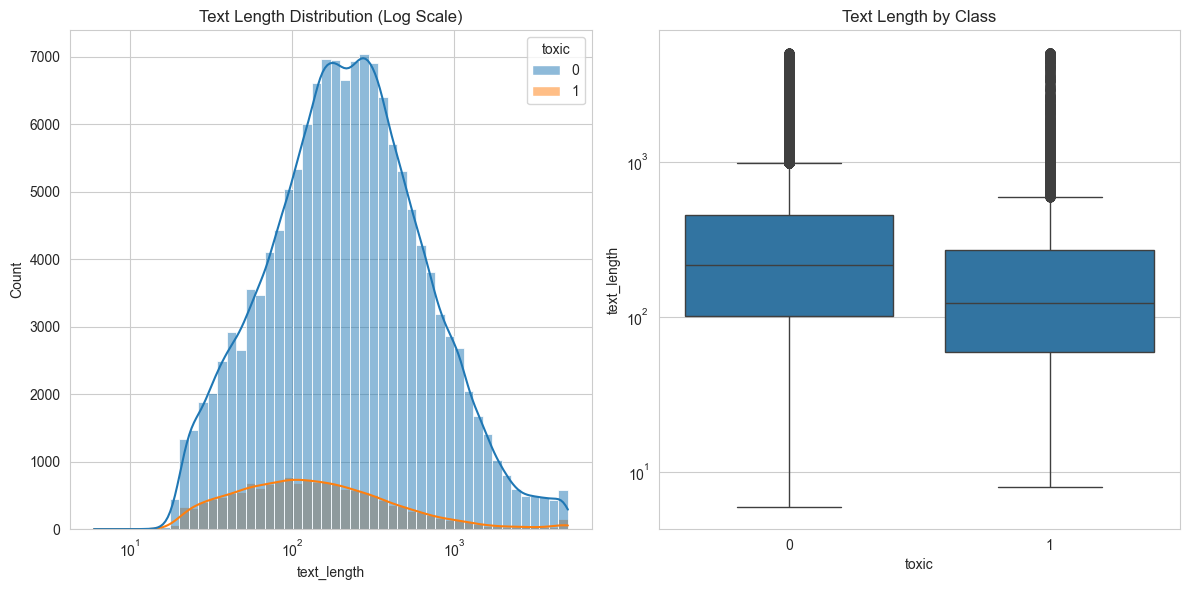

In [15]:
if 'df' in locals():
    # Create a temporary column for length analysis
    df['text_length'] = df['comment_text'].astype(str).str.len()
    
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='text_length', hue=target_col, bins=50, kde=True, log_scale=True)
    plt.title('Text Length Distribution (Log Scale)')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=target_col, y='text_length', data=df)
    plt.yscale('log')
    plt.title('Text Length by Class')
    
    plt.tight_layout()
    plt.show()

## 5. Sample Inspection
Numbers are great, but reading the data is crucial in NLP. Warning: Content may be offensive.

In [16]:
if 'df' in locals() and target_col in df.columns:
    print("--- SAMPLE TOXIC COMMENTS ---")
    toxic_samples = df[df[target_col] == 1]['comment_text'].sample(5, random_state=42).values
    for i, text in enumerate(toxic_samples):
        print(f"{i+1}. {text[:200]}...") # Truncating for display
        print("-"*50)
        
    print("\n--- SAMPLE SAFE COMMENTS ---")
    safe_samples = df[df[target_col] == 0]['comment_text'].sample(5, random_state=42).values
    for i, text in enumerate(safe_samples):
        print(f"{i+1}. {text[:200]}...")
        print("-"*50)

--- SAMPLE TOXIC COMMENTS ---
1. Hi! 

I wanna rape you!...
--------------------------------------------------
2. Terrorize 
I will terrorise you for as long as you live - you are an arrogant, disgusting and rude excuse for a human being & you are going to die soon so I suggest you stop threatening people you bas...
--------------------------------------------------
3. Being blocked

So that's your idea of mediation, is it? R Lopez can run amok through Wikipedia with his lying crap, and I get blocked for stating my intention of stopping him unless Wikipedia's rather...
--------------------------------------------------
4. Editing Wikipedia 

Fuck You, you anal rapist...
--------------------------------------------------
5. So the fact that the US Govt wants to put some dude in jail for 6 yrs is irrelevant to you?  The fact that the US Govt wants some dude to PAY restitution in over $160,000 to celebrites is irrelevant t...
--------------------------------------------------

--- SAMPLE 

## 6. Multi-Label Overview (Optional)
If the dataset has granular labels, let's see how they overlap.

Found granular labels: ['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


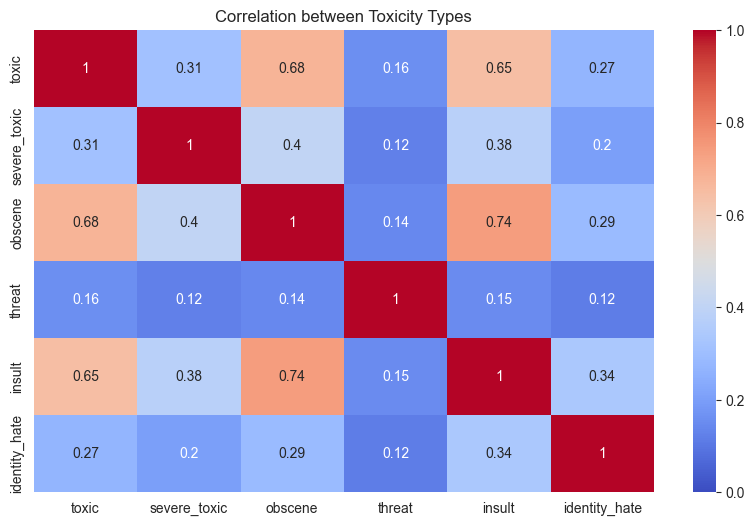

In [17]:
additional_labels = ['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
present_labels = [col for col in additional_labels if col in df.columns]

if present_labels:
    print(f"Found granular labels: {present_labels}")
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[[target_col] + present_labels].corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Correlation between Toxicity Types')
    plt.show()

## Summary & Next Steps

1. **Data Loaded**: We have confirmed the data exists and is readable.
2. **Imbalance**: We observed the ratio of toxic comments. We shouldn't use accuracy alone as a metric.
3. **Text**: We have an idea of how long the comments are, which will help us decide the `MAX_LEN` for our Deep Learning model.

**Next Phase:** Model Experimentation (`02_model_experimentation.ipynb`). We will try to build a baseline model to see if we can detect these patterns.